# 此次项目旨在确定数据分析流程及作用,从清理到预测

# 确定睡眠质量和各因素的关系
# 建立一个可以预测睡眠质量的模型

- Heart Rate Variability	心率变异性：心跳时间间隔的模拟变化
- Body Temperature	体温：以摄氏度为单位的人工生成体温
- Movement During Sleep	睡眠期间活动：睡眠时活动量的合成数据
- Sleep Duration Hours	睡眠时长：模拟生成的总睡眠小时数
- Sleep Quality Score	睡眠质量评分：代表睡眠质量的合成评分
- Caffeine Intake (mg)	咖啡因摄入量（毫克）：以毫克为单位的模拟咖啡因摄入量
- Stress Level	压力水平：压力水平的模拟指数
- Bedtime Consistency	睡眠规律性：睡眠时间一致性的模拟值；范围 0-1，数值越低表示规律性越差
- Light Exposure Hours	日间光照时长：白天接触到光照的时长

In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('wearable_tech_sleep_quality.csv')
df

,Heart_Rate_Variability,Body_Temperature,Movement_During_Sleep,Sleep_Duration_Hours,Sleep_Quality_Score,Caffeine_Intake_mg,Stress_Level,Bedtime_Consistency,Light_Exposure_hours
0,79.934283,37.199678,1.324822,4.638289,1.000000,107.624032,2.771837,0.657037,7.933949
1,67.234714,36.962317,1.855481,6.209422,1.000000,104.658589,3.738138,0.144464,6.992699
2,82.953771,36.529815,1.207580,6.879592,10.000000,0.000000,3.115880,0.642949,7.655250
3,100.460597,36.176532,1.692038,10.331531,1.000000,116.990981,3.904008,0.453255,9.429463
4,65.316933,36.849112,0.106385,8.334830,1.000000,223.282908,4.571699,0.641492,10.555713
...,...,...,...,...,...,...,...,...,...
995,64.377994,37.035075,2.077481,7.542686,1.000000,167.146932,4.404266,0.941971,8.203260
996,105.953731,36.486739,2.257753,4.383282,1.000000,265.264810,6.538063,0.565399,10.334435
997,82.816857,36.059063,0.758239,7.019553,8.445252,28.259621,3.945222,0.332975,11.176894
998,58.576420,36.418467,2.334176,9.965067,1.000000,196.795042,4.989787,0.830583,6.630026


# 1.清洗

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Heart_Rate_Variability  1000 non-null   float64
 1   Body_Temperature        1000 non-null   float64
 2   Movement_During_Sleep   1000 non-null   float64
 3   Sleep_Duration_Hours    1000 non-null   float64
 4   Sleep_Quality_Score     1000 non-null   float64
 5   Caffeine_Intake_mg      1000 non-null   float64
 6   Stress_Level            1000 non-null   float64
 7   Bedtime_Consistency     1000 non-null   float64
 8   Light_Exposure_hours    1000 non-null   float64
dtypes: float64(9)
memory usage: 70.4 KB


In [4]:
df.describe()

,Heart_Rate_Variability,Body_Temperature,Movement_During_Sleep,Sleep_Duration_Hours,Sleep_Quality_Score,Caffeine_Intake_mg,Stress_Level,Bedtime_Consistency,Light_Exposure_hours
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,70.386641,36.535418,2.005834,7.471921,2.592946,148.260148,4.940956,0.504222,8.036684
std,19.584319,0.498727,0.983454,1.540699,2.979500,94.031760,2.032708,0.204137,2.023371
min,5.174653,35.029806,-1.019512,3.105827,1.000000,0.000000,0.000000,0.000000,0.326689
25%,57.048194,36.196879,1.352000,6.393869,1.000000,80.630719,3.489725,0.361569,6.726291
50%,70.506012,36.531539,1.999749,7.500277,1.000000,145.717293,4.890507,0.500996,8.038248
75%,82.958878,36.864441,2.660915,8.500418,2.537789,211.244685,6.399490,0.644680,9.354408
max,147.054630,38.096554,5.926238,12.364639,10.000000,400.000000,10.000000,1.000000,14.754766


In [5]:
df['Sleep_Quality_Score'].value_counts()

Sleep_Quality_Score
1.000000     697
10.000000     71
7.122153       1
2.409237       1
1.485861       1
            ... 
1.040645       1
4.320292       1
4.015829       1
8.445252       1
7.075445       1
Name: count, Length: 234, dtype: int64

In [6]:
sleep01 = []
for i in df['Sleep_Quality_Score']:
    if i > 1:
        sleep01.append({"01":1})
    else:
        sleep01.append({"01":0})

In [7]:
df_sleep = pd.DataFrame(sleep01)
df_sleep

,01
0,0
1,0
2,1
3,0
4,0
...,...
995,0
996,0
997,1
998,0


In [8]:
df['Movement_During_Sleep'] = df['Movement_During_Sleep'].apply(lambda x:max(x,0))

In [9]:
df.query("Movement_During_Sleep < 0")

,Heart_Rate_Variability,Body_Temperature,Movement_During_Sleep,Sleep_Duration_Hours,Sleep_Quality_Score,Caffeine_Intake_mg,Stress_Level,Bedtime_Consistency,Light_Exposure_hours


# 2.探索数据
### 旨在了解数据之间关系

## 了解数据之间相关性防止共线性问题

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

<function matplotlib.pyplot.show(close=None, block=None)>

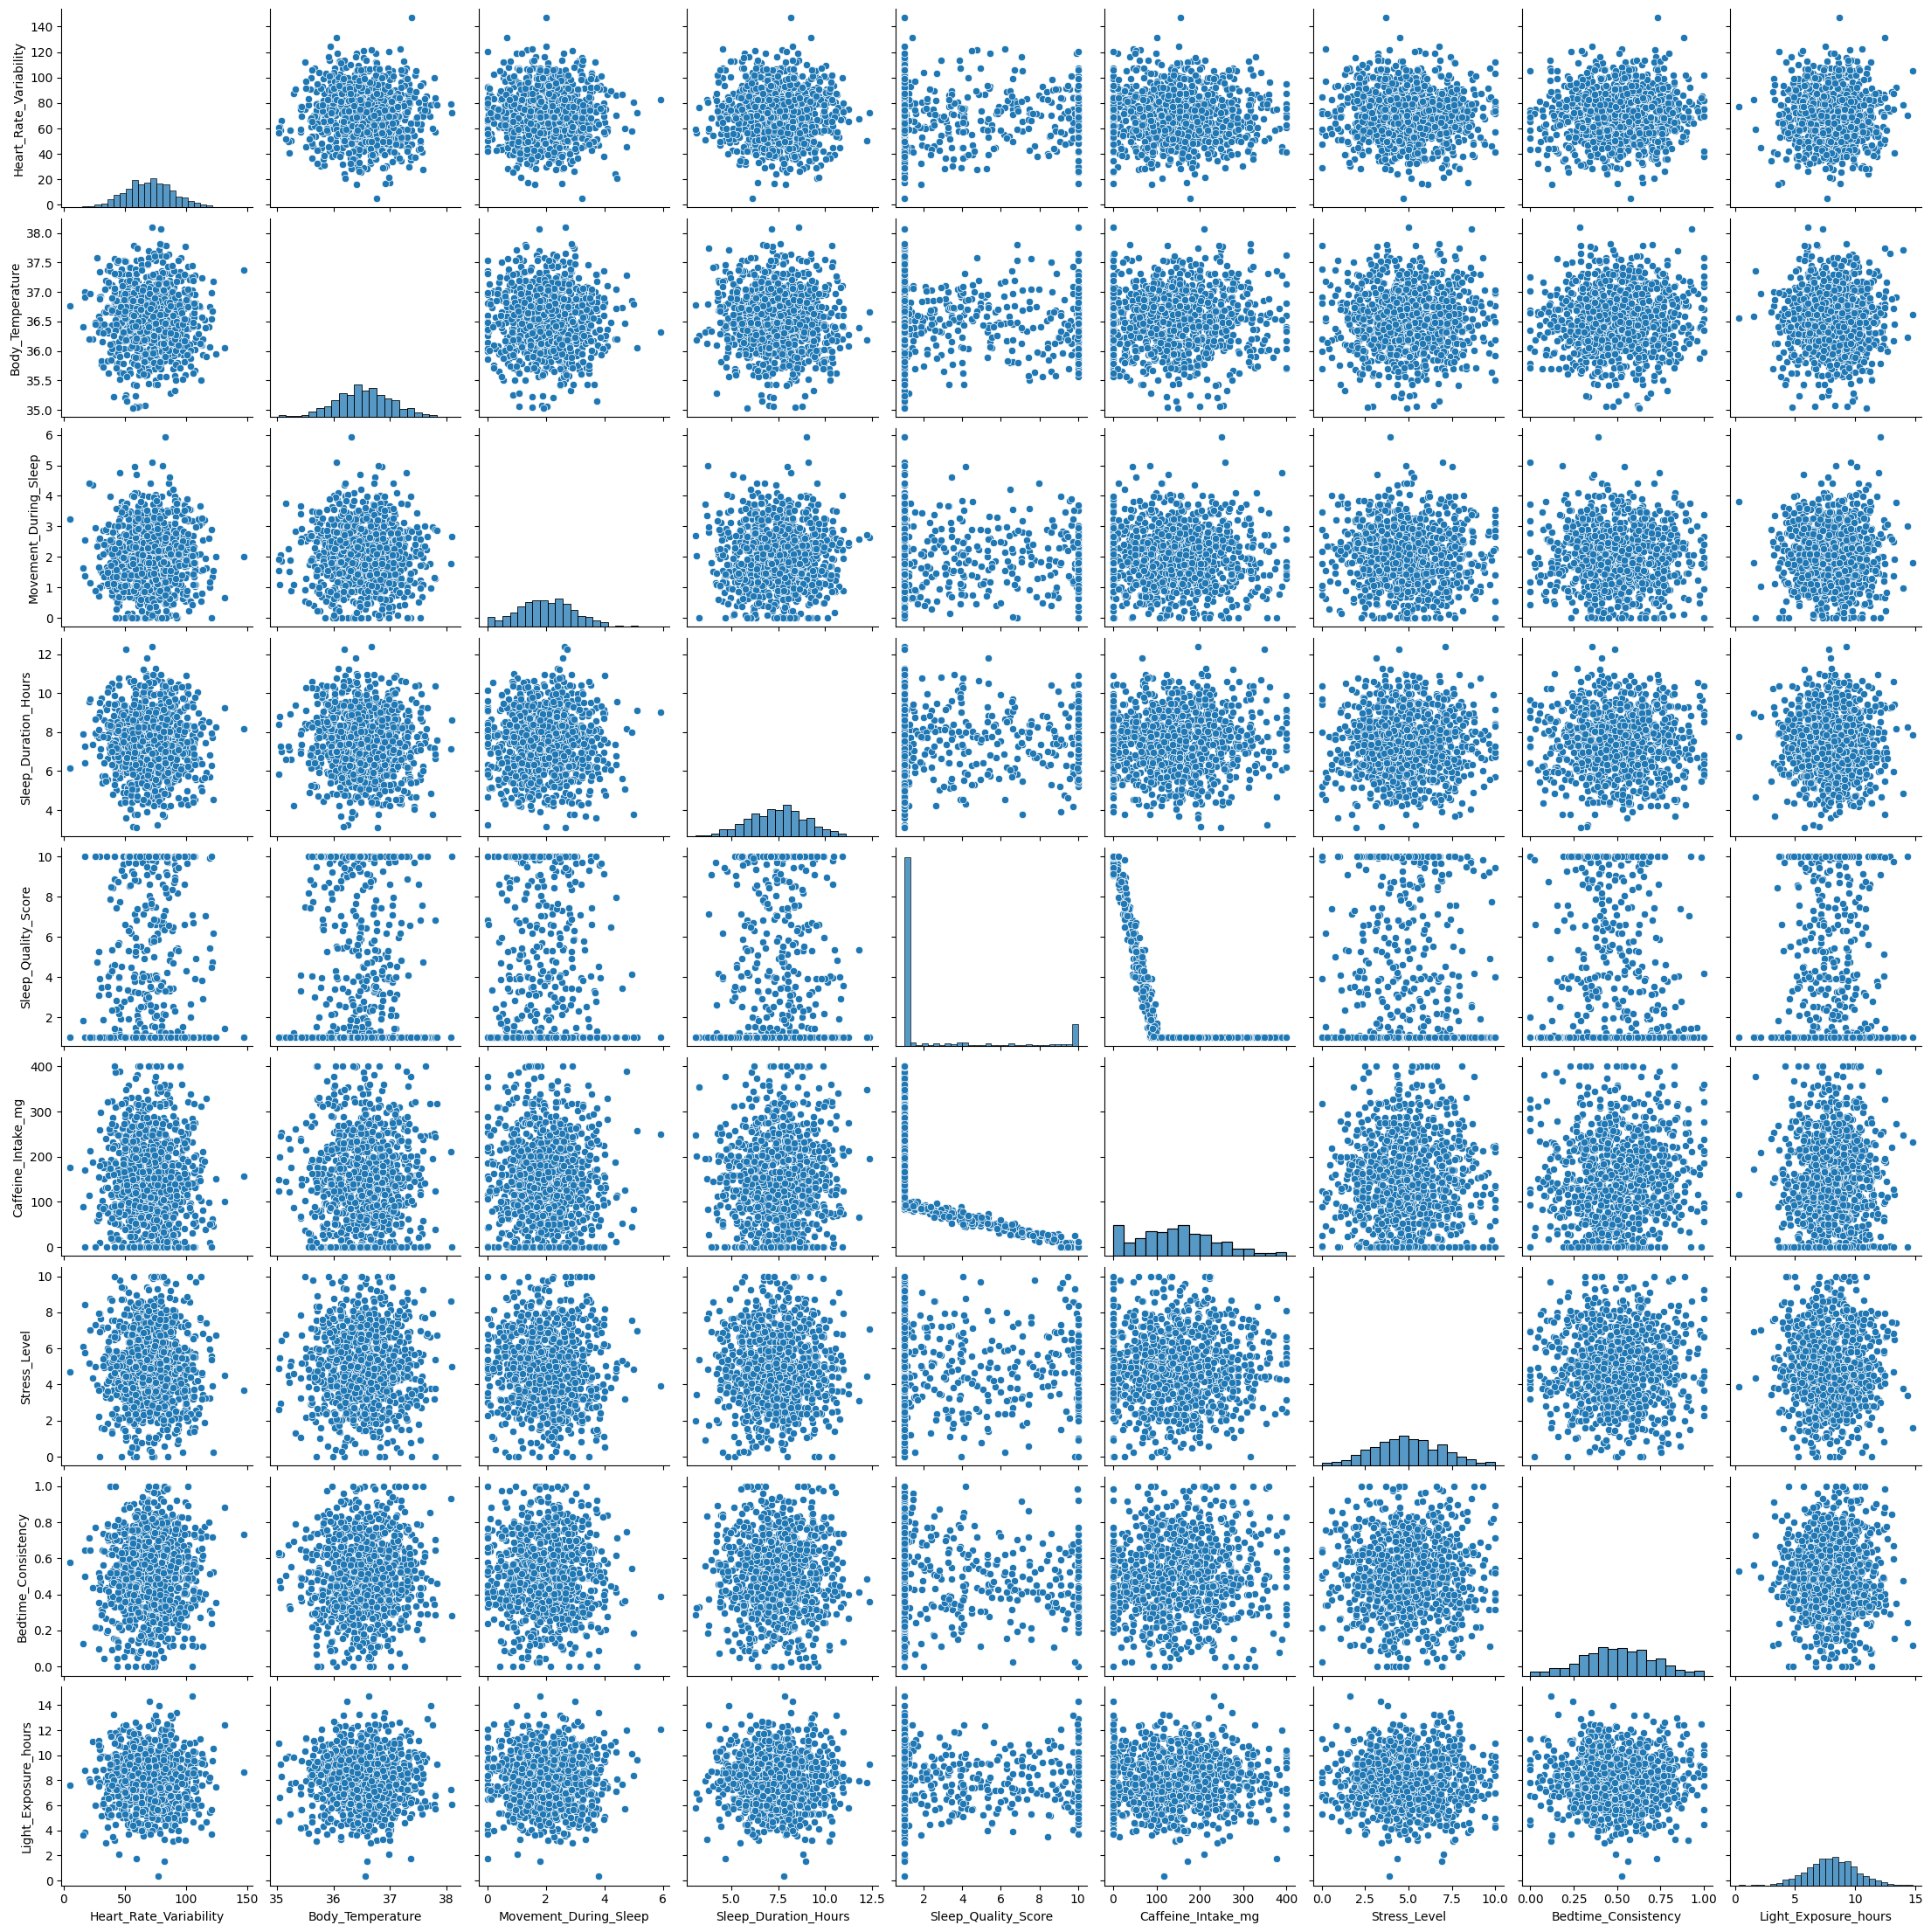

In [11]:
sns.pairplot(df)
plt.show

# 3.预测数据

## 分类变量不多时采用sm模块

## 多时采用sklearn

In [12]:
import statsmodels.api as sm

In [13]:
y = df_sleep
x = df.drop('Sleep_Quality_Score',axis = 1)

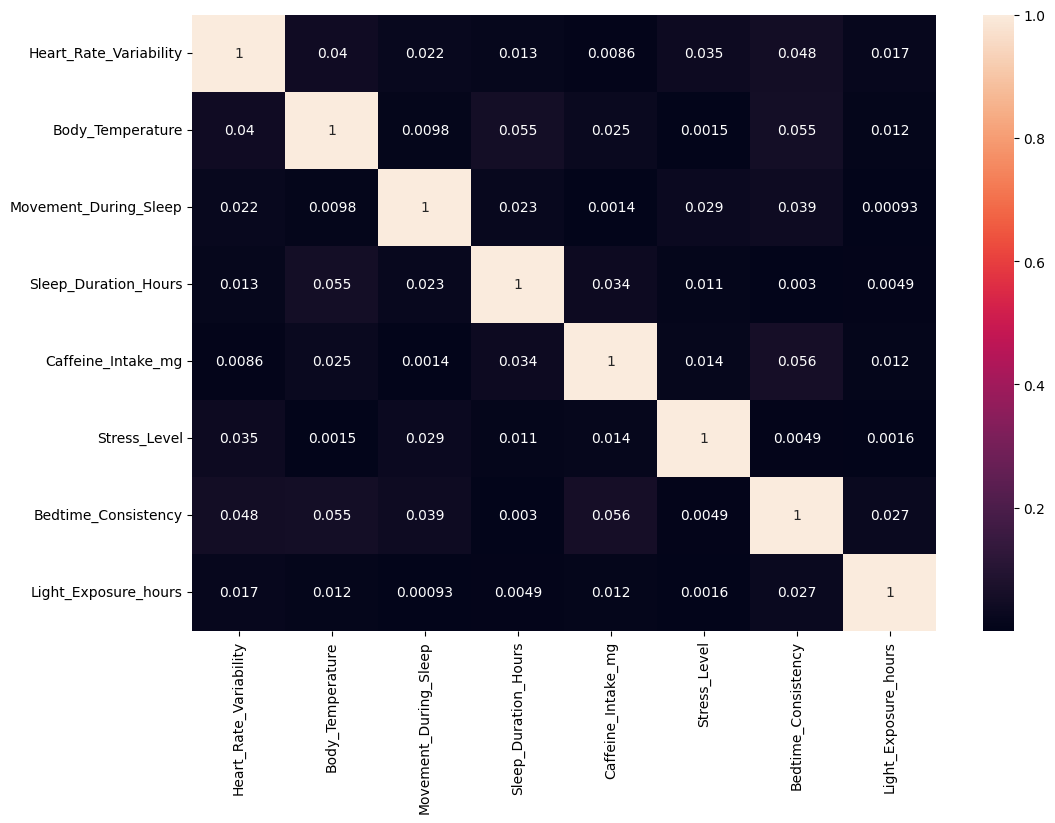

In [14]:
plt.rcParams['figure.figsize'] = (12,8)
sns.heatmap(x.corr().abs(),annot = True)
plt.show()

In [15]:
x = sm.add_constant(x)

In [16]:
x

,const,Heart_Rate_Variability,Body_Temperature,Movement_During_Sleep,Sleep_Duration_Hours,Caffeine_Intake_mg,Stress_Level,Bedtime_Consistency,Light_Exposure_hours
0,1.0,79.934283,37.199678,1.324822,4.638289,107.624032,2.771837,0.657037,7.933949
1,1.0,67.234714,36.962317,1.855481,6.209422,104.658589,3.738138,0.144464,6.992699
2,1.0,82.953771,36.529815,1.207580,6.879592,0.000000,3.115880,0.642949,7.655250
3,1.0,100.460597,36.176532,1.692038,10.331531,116.990981,3.904008,0.453255,9.429463
4,1.0,65.316933,36.849112,0.106385,8.334830,223.282908,4.571699,0.641492,10.555713
...,...,...,...,...,...,...,...,...,...
995,1.0,64.377994,37.035075,2.077481,7.542686,167.146932,4.404266,0.941971,8.203260
996,1.0,105.953731,36.486739,2.257753,4.383282,265.264810,6.538063,0.565399,10.334435
997,1.0,82.816857,36.059063,0.758239,7.019553,28.259621,3.945222,0.332975,11.176894
998,1.0,58.576420,36.418467,2.334176,9.965067,196.795042,4.989787,0.830583,6.630026


In [58]:
result = sm.Logit(y,x).fit()
result.summary()

ValueError: endog must be in the unit interval.

In [18]:
x = x.drop(['const','Heart_Rate_Variability','Body_Temperature','Light_Exposure_hours','Movement_During_Sleep'],axis = 1)

In [21]:
result.predict(x.loc[777])

None    0.006774
dtype: float64

In [22]:
y.loc[777]

01    0
Name: 777, dtype: int64

# 通过将睡眠分数改为低和高提升了正确率

## 看来stats模型是分类变量预测的神

# 这次改用林子模型

In [25]:
y = df['Sleep_Quality_Score']
y

0       1.000000
1       1.000000
2      10.000000
3       1.000000
4       1.000000
         ...    
995     1.000000
996     1.000000
997     8.445252
998     1.000000
999     7.075445
Name: Sleep_Quality_Score, Length: 1000, dtype: float64

In [26]:
x

,Sleep_Duration_Hours,Caffeine_Intake_mg,Stress_Level,Bedtime_Consistency
0,4.638289,107.624032,2.771837,0.657037
1,6.209422,104.658589,3.738138,0.144464
2,6.879592,0.000000,3.115880,0.642949
3,10.331531,116.990981,3.904008,0.453255
4,8.334830,223.282908,4.571699,0.641492
...,...,...,...,...
995,7.542686,167.146932,4.404266,0.941971
996,4.383282,265.264810,6.538063,0.565399
997,7.019553,28.259621,3.945222,0.332975
998,9.965067,196.795042,4.989787,0.830583


In [23]:
from sklearn.model_selection import train_test_split

In [24]:
from sklearn.ensemble import RandomForestRegressor

In [28]:
y_log = np.log1p(y)
y_log

0      0.693147
1      0.693147
2      2.397895
3      0.693147
4      0.693147
         ...   
995    0.693147
996    0.693147
997    2.245512
998    0.693147
999    2.088828
Name: Sleep_Quality_Score, Length: 1000, dtype: float64

# 分成对数组和原型组

## 首先分析对数组

In [31]:
x_train,x_test,y_log_train,y_log_test = train_test_split(x,y_log,test_size = 0.2,random_state = 15)

In [27]:
rf_model_log = RandomForestRegressor()

In [32]:
rf_model_log.fit(x_train,y_log_train)

RandomForestRegressor()

# 测试一下准度

In [33]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score

In [34]:
y_pred_log = rf_model_log.predict(x_test)

In [37]:
y_pred_log

array([2.39789527, 0.69314718, 1.09139558, 0.69314718, 0.69314718,
       2.39090665, 2.39231962, 1.53342125, 0.69314718, 0.69314718,
       0.69314718, 0.69314718, 0.69314718, 0.69314718, 1.6573559 ,
       2.39534248, 0.69314718, 0.69314718, 2.39560331, 0.69314718,
       0.69314718, 2.31805216, 0.69314718, 1.54181928, 0.69314718,
       0.69314718, 0.69314718, 0.69314718, 1.96916065, 0.69314718,
       0.69314718, 0.69314718, 2.39067478, 1.76517511, 0.75882487,
       0.69314718, 2.04070515, 0.69314718, 0.69314718, 0.69314718,
       0.69314718, 0.69314718, 0.69314718, 2.39789527, 0.69314718,
       0.69314718, 2.39789527, 2.39789527, 1.59136725, 0.69314718,
       0.69314718, 0.69314718, 2.39692506, 0.71177223, 0.69314718,
       0.69314718, 0.69314718, 0.69314718, 0.69314718, 0.69314718,
       0.69314718, 0.69314718, 2.31213986, 1.35050032, 0.69314718,
       0.69314718, 2.3564806 , 0.69314718, 0.69314718, 0.75561774,
       0.69314718, 0.69314718, 0.69314718, 0.69314718, 0.69314

In [35]:
y_pred = np.exp(y_pred_log)

In [36]:
y_pred

array([11.        ,  2.        ,  2.97842782,  2.        ,  2.        ,
       10.92339315, 10.93883853,  4.63400381,  2.        ,  2.        ,
        2.        ,  2.        ,  2.        ,  2.        ,  5.24542308,
       10.97195508,  2.        ,  2.        , 10.97481733,  2.        ,
        2.        , 10.15587303,  2.        ,  4.6730842 ,  2.        ,
        2.        ,  2.        ,  2.        ,  7.16466031,  2.        ,
        2.        ,  2.        , 10.92086061,  5.84259536,  2.13576494,
        2.        ,  7.69603412,  2.        ,  2.        ,  2.        ,
        2.        ,  2.        ,  2.        , 11.        ,  2.        ,
        2.        , 11.        , 11.        ,  4.91045816,  2.        ,
        2.        ,  2.        , 10.98933285,  2.03759916,  2.        ,
        2.        ,  2.        ,  2.        ,  2.        ,  2.        ,
        2.        ,  2.        , 10.09600558,  3.85935596,  2.        ,
        2.        , 10.55374313,  2.        ,  2.        ,  2.12

In [38]:
y_test = np.exp(y_log_test)

In [39]:
mse_log = mean_squared_error(y_test,y_pred)
mase_log = np.exp(mse_log)
mae_log = mean_absolute_error(y_test,y_pred)
r2_log = r2_score(y_test,y_pred)

In [41]:
print(f"{mse_log}\n{mase_log}\n{mae_log}\n{r2_log}\n")

0.09966882979422043
1.1048049789926921
0.1319675656466022
0.9893893000159207



# 我去0.99的拟合度,哈哈哈树模型大人,啊不随机森林模型大人,昨天我不该说您垃圾的

In [55]:
y_pred

array([11.        ,  2.        ,  2.97842782,  2.        ,  2.        ,
       10.92339315, 10.93883853,  4.63400381,  2.        ,  2.        ,
        2.        ,  2.        ,  2.        ,  2.        ,  5.24542308,
       10.97195508,  2.        ,  2.        , 10.97481733,  2.        ,
        2.        , 10.15587303,  2.        ,  4.6730842 ,  2.        ,
        2.        ,  2.        ,  2.        ,  7.16466031,  2.        ,
        2.        ,  2.        , 10.92086061,  5.84259536,  2.13576494,
        2.        ,  7.69603412,  2.        ,  2.        ,  2.        ,
        2.        ,  2.        ,  2.        , 11.        ,  2.        ,
        2.        , 11.        , 11.        ,  4.91045816,  2.        ,
        2.        ,  2.        , 10.98933285,  2.03759916,  2.        ,
        2.        ,  2.        ,  2.        ,  2.        ,  2.        ,
        2.        ,  2.        , 10.09600558,  3.85935596,  2.        ,
        2.        , 10.55374313,  2.        ,  2.        ,  2.12

In [56]:
y_test

825    11.000000
374     2.000000
488     2.999904
608     2.000000
42      2.000000
         ...    
664     2.000000
962     2.000000
144     2.000000
955     2.000000
372     7.626897
Name: Sleep_Quality_Score, Length: 200, dtype: float64